# 讀取姿勢特徵

In [119]:
import os
import numpy as np

# 指定資料夾路徑
folder_path = 'data/Yu_Darvish_FF_videos_4S/features'

# 取得所有 .npy 檔案的完整路徑
npy_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.npy')]

# 讀取所有 .npy 檔案並儲存在一個 list 中
all_features = [np.load(f) for f in npy_files]

# 可選：顯示第一筆資料的形狀來確認內容
print(f"共有 {len(all_features)} 筆資料")
print("第一筆資料形狀：", all_features[0].shape)


共有 200 筆資料
第一筆資料形狀： (4,)


# 整合姿勢特徵和CSV數據特徵

In [120]:
import pandas as pd
columns = ["leg_angle","arm_symmetry","elbow_angle","hip_twist"]
all_features_array = np.stack(all_features)
pose_feat = pd.DataFrame(all_features_array,columns=columns)
print(f"pose_feat shape: {pose_feat.shape}")
display(pose_feat.head())
csv_feat = pd.read_csv('data/Downloads/Yu_Darvish_FF_with_videos.csv')
print(f"csv_feat shape: {csv_feat.shape}")
display(csv_feat.head())

pose_feat shape: (200, 4)


,leg_angle,arm_symmetry,elbow_angle,hip_twist
0,9.188042,0.985855,152.651703,0.132142
1,7.389526,0.986820,99.789989,0.112606
2,13.690172,0.994170,162.254310,0.084688
3,21.226712,0.988464,118.585723,0.104180
4,15.912408,0.989651,174.722999,0.109520


csv_feat shape: (759, 119)


,video_filename,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,pitch_0001.mp4,FF,2022/9/30,91.3,-2.31,5.34,"Darvish, Yu",543281,506433,NaN,...,1.0,1.27,0.37,0.37,38.7,NaN,NaN,NaN,NaN,NaN
1,pitch_0002.mp4,FF,2022/9/30,91.9,-2.02,5.54,"Darvish, Yu",543281,506433,NaN,...,1.0,1.28,0.51,0.51,44.1,NaN,NaN,NaN,NaN,NaN
2,pitch_0003.mp4,FF,2022/9/30,94.2,-2.13,5.39,"Darvish, Yu",656024,506433,field_out,...,2.0,1.09,0.42,0.42,40.3,NaN,NaN,NaN,NaN,NaN
3,pitch_0004.mp4,FF,2022/9/30,93.7,-2.54,5.25,"Darvish, Yu",660162,506433,double,...,1.0,1.19,0.84,-0.84,32.1,NaN,NaN,NaN,NaN,NaN
4,pitch_0005.mp4,FF,2022/9/30,92.3,-2.56,5.26,"Darvish, Yu",657757,506433,NaN,...,1.0,1.22,0.86,-0.86,32.4,NaN,NaN,NaN,NaN,NaN


# Join data

In [121]:
pose_feat['video_filename'] = pose_feat.index.map(lambda i: f'pitch_{i+1:04d}.mp4')
merged_df = pd.merge(pose_feat, csv_feat, on='video_filename', how='inner') 
merged_df = merged_df[['leg_angle','arm_symmetry','elbow_angle','hip_twist','description']]
merged_df

,leg_angle,arm_symmetry,elbow_angle,hip_twist,description
0,9.188042,0.985855,152.651703,0.132142,ball
1,7.389526,0.986820,99.789989,0.112606,ball
2,13.690172,0.994170,162.254310,0.084688,hit_into_play
3,21.226712,0.988464,118.585723,0.104180,hit_into_play
4,15.912408,0.989651,174.722999,0.109520,foul
...,...,...,...,...,...
195,23.801676,0.999601,90.961732,0.126544,called_strike
196,12.965349,0.987085,100.343663,0.227897,hit_into_play
197,16.370888,0.994124,110.105946,0.108508,foul
198,6.308718,0.994659,142.308147,0.166670,called_strike


# 相關性檢查

In [122]:
merged_df[[	'leg_angle','arm_symmetry','elbow_angle','hip_twist']].corr()

,leg_angle,arm_symmetry,elbow_angle,hip_twist
leg_angle,1.000000,-0.000719,-0.099099,-0.186883
arm_symmetry,-0.000719,1.000000,-0.116797,0.068838
elbow_angle,-0.099099,-0.116797,1.000000,-0.010973
hip_twist,-0.186883,0.068838,-0.010973,1.000000


變量之間沒啥關聯

# 直方圖分析

array([[<Axes: title={'center': 'leg_angle'}>,
        <Axes: title={'center': 'arm_symmetry'}>],
       [<Axes: title={'center': 'elbow_angle'}>,
        <Axes: title={'center': 'hip_twist'}>]], dtype=object)

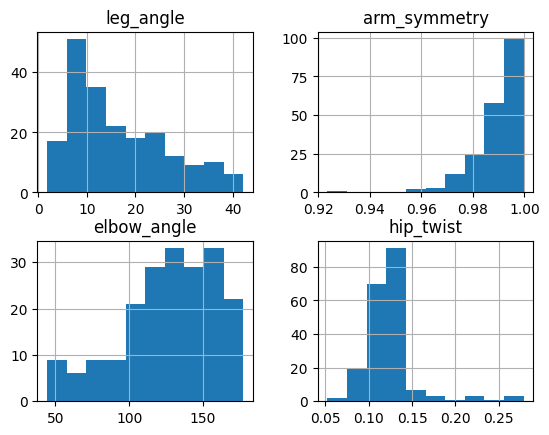

In [123]:
merged_df[[	'leg_angle','arm_symmetry','elbow_angle','hip_twist']].hist()

# 類別變數分析

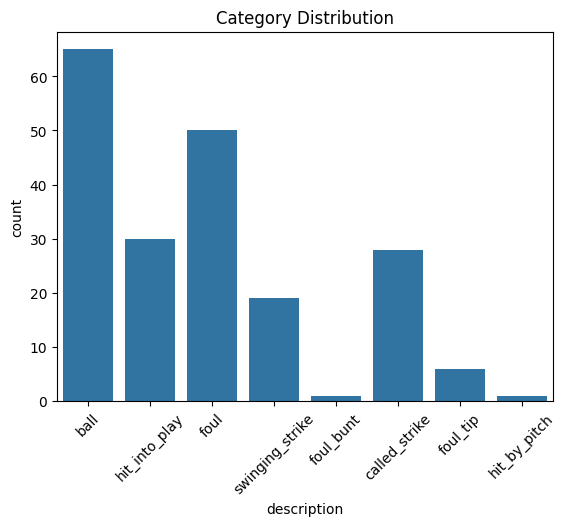

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='description', data=merged_df)
plt.xticks(rotation=45)  # 如果類別名稱很長可旋轉
plt.title('Category Distribution')
plt.show()


In [125]:
merged_df['description'].value_counts()

description
ball               65
foul               50
hit_into_play      30
called_strike      28
swinging_strike    19
foul_tip            6
foul_bunt           1
hit_by_pitch        1
Name: count, dtype: int64

# 前處理

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 對數值特徵進行標準化
scaled_features = scaler.fit_transform(merged_df[['leg_angle', 'arm_symmetry', 'elbow_angle', 'hip_twist']])
# 將標準化後的特徵轉換回 DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=['leg_angle', 'arm_symmetry', 'elbow_angle', 'hip_twist'])
# 將標準化後的特徵與描述合併
scaled_df['description'] = merged_df['description'].values
# 顯示標準化後的特徵
print(scaled_df.head())

   leg_angle  arm_symmetry  elbow_angle  hip_twist    description
0  -0.746883     -0.397618     0.787770   0.222891           ball
1  -0.928541     -0.295476    -0.859185  -0.434851           ball
2  -0.292151      0.482334     1.086949  -1.374801  hit_into_play
3   0.469070     -0.121445    -0.273587  -0.718544  hit_into_play
4  -0.067696      0.004156     1.475422  -0.538745           foul


In [127]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 初始化 LabelEncoder
le = LabelEncoder()

# 對 y 欄位進行 label encoding
scaled_df['description'] = le.fit_transform(scaled_df['description'])

# 若想保留 label 對應關係，可使用以下方式列出
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print(scaled_df.head())
print("Label mapping:", label_mapping)


   leg_angle  arm_symmetry  elbow_angle  hip_twist  description
0  -0.746883     -0.397618     0.787770   0.222891            0
1  -0.928541     -0.295476    -0.859185  -0.434851            0
2  -0.292151      0.482334     1.086949  -1.374801            6
3   0.469070     -0.121445    -0.273587  -0.718544            6
4  -0.067696      0.004156     1.475422  -0.538745            2
Label mapping: {'ball': 0, 'called_strike': 1, 'foul': 2, 'foul_bunt': 3, 'foul_tip': 4, 'hit_by_pitch': 5, 'hit_into_play': 6, 'swinging_strike': 7}


# 特徵分析

In [128]:
import pandas as pd
from scipy.stats import f_oneway

# 假設你的 DataFrame 是 df
# 類別欄位
target_col = 'description'

# 數值欄位，排除 description
num_cols = scaled_df.drop(columns=['description']).columns.tolist()

anova_results = []

for col in num_cols:
    groups = [scaled_df[scaled_df[target_col] == cat][col].dropna() for cat in scaled_df[target_col].unique()]
    F, p = f_oneway(*groups)
    anova_results.append({'feature': col, 'F_stat': F, 'p_value': p})

# 轉成 DataFrame 並排序
anova_df = pd.DataFrame(anova_results)
anova_df = anova_df.sort_values(by='F_stat', ascending=False)
anova_df


,feature,F_stat,p_value
3,hip_twist,1.344463,0.231390
2,elbow_angle,1.175546,0.318568
0,leg_angle,1.173065,0.320013
1,arm_symmetry,1.139076,0.340292


# 建模

In [129]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

models = {
    "SVM": SVC(probability=False, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
}

X = scaled_df.drop(columns=['description'])
y = scaled_df['description']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"{name} - Accuracy: {accuracy:.4f}")


SVM - Accuracy: 0.3485
LogisticRegression - Accuracy: 0.3333
MLP - Accuracy: 0.2727
XGBoost - Accuracy: 0.3030
